# Tarea #1

## Imports

In [953]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Análisis Exploratorio de Datos (EDA) y Limpieza
Abrir los datos con pandas:

In [954]:
dataset=pd.read_csv('./house_price_regression_dataset.csv')
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [955]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Se puede observar que el dataset se abre de forma correcta.

In [956]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## Tratar Nulos

In [957]:
dataset.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Como se puede observar, no hay datos nulos en el dataset

## Manejar Outliers

<Axes: xlabel='Square_Footage'>

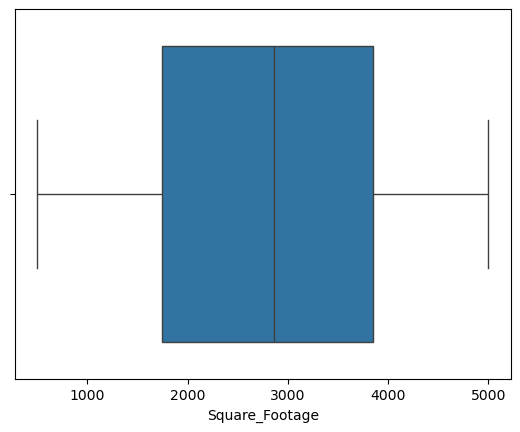

In [958]:
sns.boxplot(dataset,x='Square_Footage')

Para manejar los outliers se utilizará la técnica de IQR o rango intercuantílico

In [959]:

q1=dataset.quantile(.25)
q3=dataset.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
dataset=dataset[(dataset>LowerBound)&(dataset<UpperBound)]



In [960]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Como se puede observar, no hubo instancias fuera del rango. Por lo tanto, no hay outliers

## 2. Selección de Características
Mapa de calor de la matriz de correlación de pearson:

<Axes: >

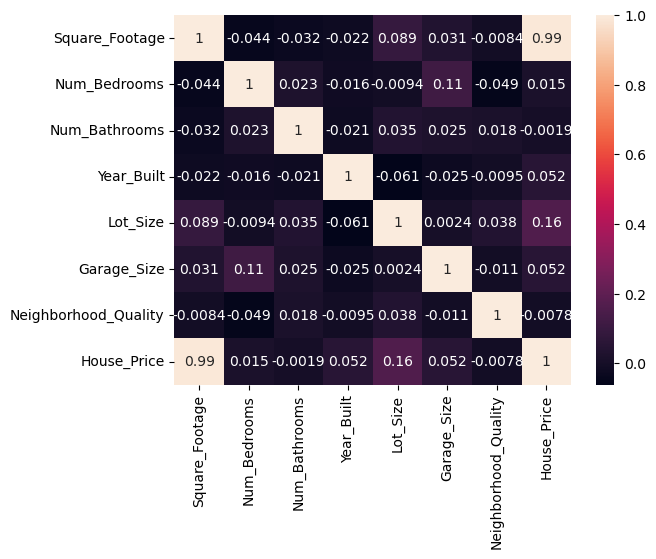

In [961]:
sns.heatmap(dataset.corr('pearson'),annot=True)

Mapa de calor de la matriz de correlación de spearman:

<Axes: >

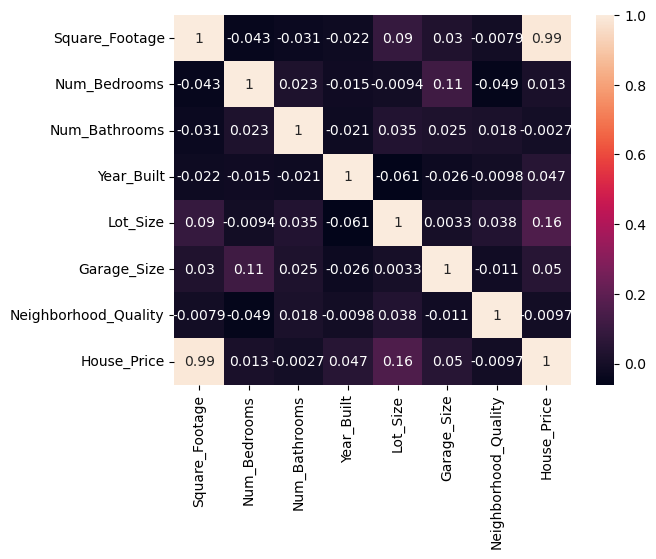

In [962]:
sns.heatmap(dataset.corr('spearman'),annot=True)

Como se puede observar, las variables con mayor correlación con el precio de la casa son los pies cuadrados, el año de construcción, el tamaño del lote y el tamaño del garaje. Todos estos datos alcanzan una correlación mayor a 0.05, por lo tanto se utilizarán para entrenar un modelo. También se hará un modelo con el tamaño del lote y los pies cuadrados únicamente. Que son los únicos 2 con correlación > 0.1.

## Division de los datos
La división de datos se hace con random sampling, haciendo un shuffle de los datos.
#### División de dataset con todos los features

In [963]:
X = dataset.drop(["House_Price"], axis=1)
y = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=0, shuffle=True)



#### División de dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje

In [964]:
X1 = dataset.drop(["House_Price", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"], axis=1)
y1 = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.125, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados y tamaño del lote

In [965]:
X2 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality"], axis=1)
y2 = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.125, random_state=0, shuffle=True)

## 3. Normalizacion de los datos

In [966]:
# sc = StandardScaler()
# dataset = sc.fit_transform(dataset)

## 4. Conversion a un dataframe

In [967]:
# columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
#            'Year_Built', 'Lot_Size', 'Garage_Size', 
#            'Neighborhood_Quality', 'House_Price']

# dataset = pd.DataFrame(data=dataset, columns=columns)
# dataset.head(2)

## 6. Entrenamiento
### Implementación de Regresión Lineal

In [968]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

#### Cálculo de error

In [969]:
def MSE(y, output):
    return (output-y)**2

#### Funciones para Actualización de Parámetros

In [970]:
def derivada_L_w(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto W
    output = wx+b
    '''
    return 2*x*(output - y)

In [971]:
def derivada_L_b(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto b
    output = wx+b
    '''
    return 2*(output-y)

### Funciones de Graficación
#### Función de Gráfico de MSE

In [972]:
def plotMSE(historial_mse_epochs):
    # Puntos de cada MSE
    epochs, mses = zip(*historial_mse_epochs)

    # Graficar la recta generada por el modelo
    plt.scatter(epochs, mses, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'Curva de Error | Epoch {max(epochs)}')
    plt.grid(True)
    plt.show()

#### Función de Gráfico de Testing

In [973]:
# def plotRegresion(w, b):
#     # Generar datos para graficar
#     x_data = np.linspace(-10, 10, 100)  # Genera 100 puntos entre -10 y 10

#     # Calcular los valores de y utilizando el modelo
#     y_data = modelo(x_data, w, b)

#     # Puntos de muestra
#     samples = [(1, 2), (2, 4), (3, 6), (4, 8)]
#     sample_x, sample_y = zip(*samples)

#     # Graficar la recta generada por el modelo
#     plt.plot(, label='Recta de Regresión f(x)')
#     plt.scatter(sample_x, sample_y, color='red', label='Datos entrenamiento')  # Agregar puntos de muestra
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Recta de Regresión Lineal con datos de entrenamiento')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

## Training

In [974]:
def generar_params_iniciales(*dimensiones_w):
    w = np.random.rand(*dimensiones_w)
    b = np.random.default_rng().random()
    return w, b

In [975]:
def entrenar(training_dataset, training_labels, validation_dataset, validation_labels, epochs = 400, alfa = 0.005, plot_cada_n=-1):
    w, b = generar_params_iniciales(*training_dataset.columns.shape)

    historial_error_epochs = []

    # Época
    for epoch in range(epochs):
        errores_por_instancia = []
        derivadas_w = []
        derivadas_b = []
        for (x, y) in zip(training_dataset.values, training_labels):
            # Correr el modelo por cada instancia y calcular su error y funcion de pérdida
            output = modelo(x, w, b)
            error = MSE(y, output)
            errores_por_instancia.append(error)
            derivada_w = derivada_L_w(x, y, output)
            derivadas_w.append(derivada_w)
            derivada_b = derivada_L_b(x, y, output)
            derivadas_b.append(derivada_b)

        # Cálculo de Promedios
        promedio_dw = np.mean(derivadas_w, axis=0)
        promedio_db = np.mean(derivadas_b)
        promedio_error = np.mean(errores_por_instancia)

        historial_error_epochs.append((epoch, promedio_error))

        # Actualización de Parámetros
        w = w - alfa*promedio_dw
        b = b - alfa*promedio_db

        if (plot_cada_n > 0 and epoch != 0 and epoch % plot_cada_n == 0):
            print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {promedio_error:.5F}, B = {b:.5F}, W =", w)
            plotMSE(historial_error_epochs)

        # TODO: VALIDACION

    return w, b


## Testing

In [976]:
def testear(w, b, testing_dataset, testing_labels, ):
    #TODO: Esto hay que cambiarlo, por métricas de Loss y Accuracy
    errores_por_instancia = []
    for (x, y) in zip(testing_dataset.values, testing_labels):
        output = modelo(x, w, b)
        error = MSE(output, y)
        errores_por_instancia.append(error)

    promedio_error = np.mean(errores_por_instancia)
    
    print(f"Valor de función de perdida (Loss Function) para testing = {promedio_error:.5F}")


# Ejecuciones:
## Correr training con todos los features: Epochs 400 y Alfa: 0.00000003

Epoca 50, valor de función de perdida (Loss Function) = 331609994786.82880, B = 2.13124, W = [216.2622776    6.28001084   3.95480006 312.54806698   6.06011043
   2.75841656  11.38861562]


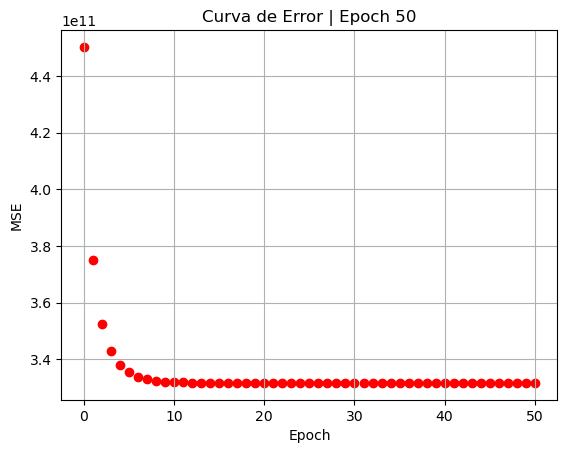

Epoca 100, valor de función de perdida (Loss Function) = 331590840785.27216, B = 3.46567, W = [216.2618848   11.8119944    7.60212145 312.54771727  11.39756045
   4.74853732  21.98563429]


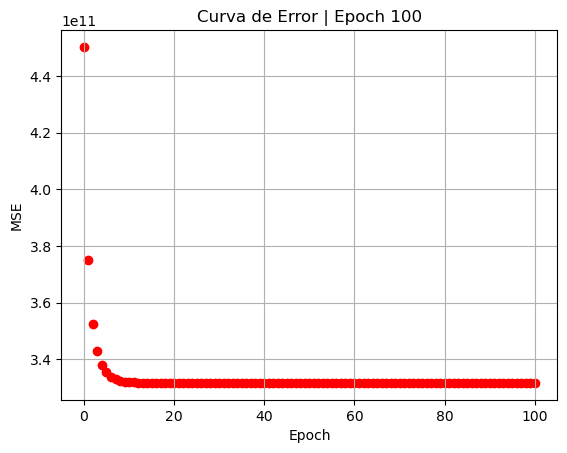

Epoca 150, valor de función de perdida (Loss Function) = 331571689934.34814, B = 4.80006, W = [216.26149201  17.3437855   11.24938592 312.54704564  16.73484835
   6.7386434   32.58133716]


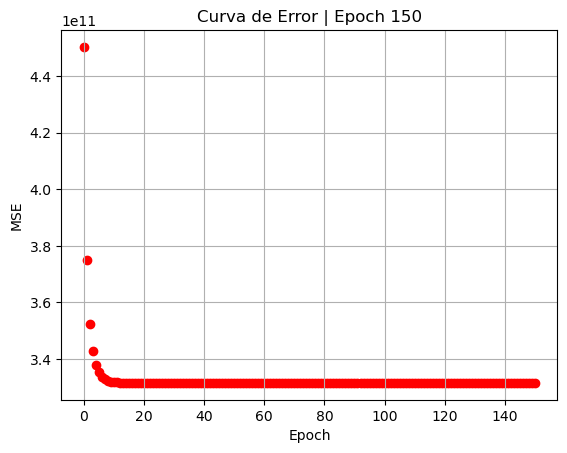

Epoca 200, valor de función de perdida (Loss Function) = 331552542233.26599, B = 6.13440, W = [216.26109924  22.87538416  14.89659348 312.54637403  22.07197414
   8.7287348   43.17572439]


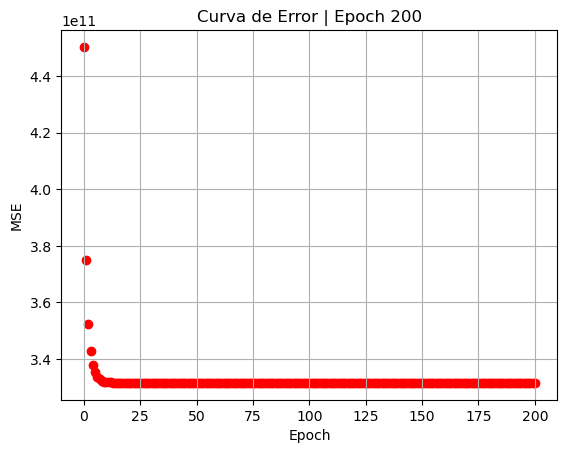

Epoca 250, valor de función de perdida (Loss Function) = 331533397681.33521, B = 7.46869, W = [216.26070648  28.40679037  18.54374413 312.54570245  27.40893783
  10.71881151  53.76879613]


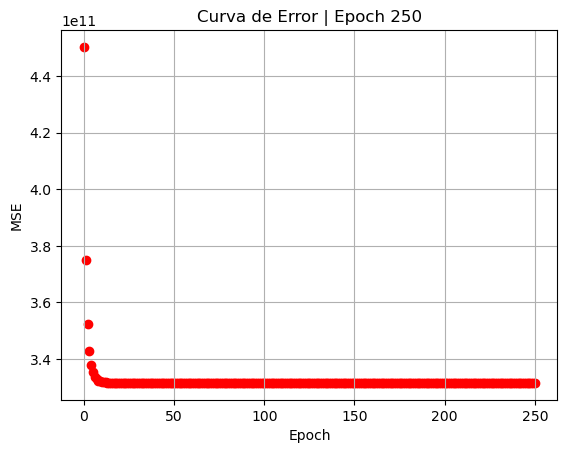

Epoca 300, valor de función de perdida (Loss Function) = 331514256277.86554, B = 8.80294, W = [216.26031373  33.93800414  22.19083786 312.54503089  32.74573942
  12.70887353  64.36055257]


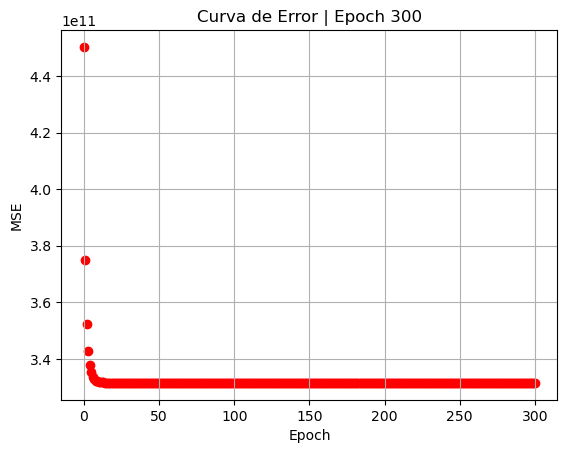

Epoca 350, valor de función de perdida (Loss Function) = 331495118022.16699, B = 10.13714, W = [216.259921    39.46902549  25.83787468 312.54435936  38.08237891
  14.69892087  74.95099384]


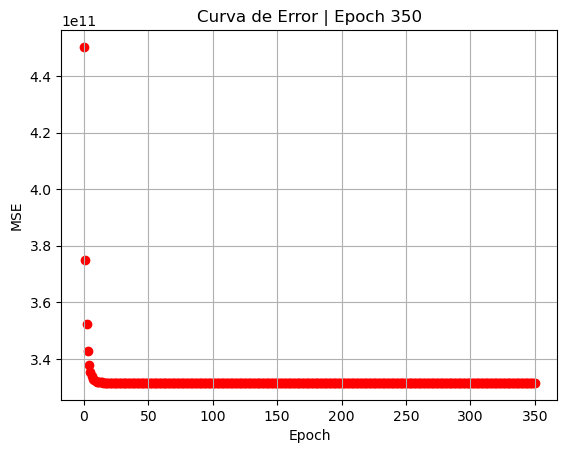

Valor de función de perdida (Loss Function) para testing = 326873480376.77100


In [984]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.00000003, plot_cada_n=50)
testear(w, b, X_test, y_test)

###

## Correr training con selección de features #1: Epochs 400 y Alfa: 0.0000001

Epoca 50, valor de función de perdida (Loss Function) = 242191427163.35757, B = 3.94647, W = [219.57206353 312.54745864  18.9475907    6.76769134]


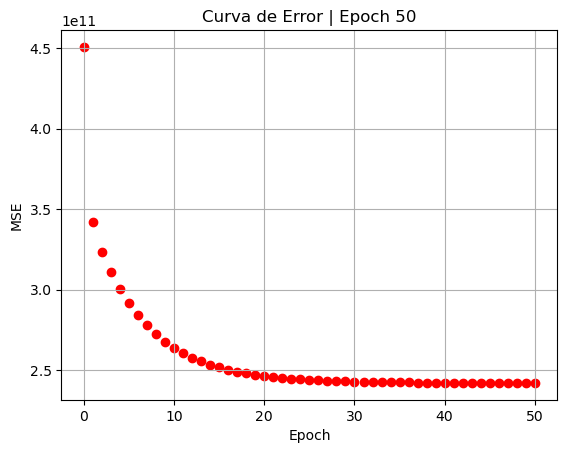

Epoca 100, valor de función de perdida (Loss Function) = 242140450807.47446, B = 7.07386, W = [216.31583383 312.54588435  36.73722529  13.4012886 ]


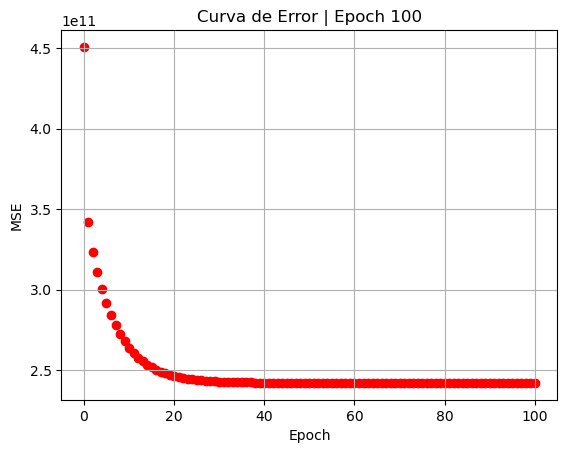

Epoca 150, valor de función de perdida (Loss Function) = 242120465434.73419, B = 10.20132, W = [216.26081238 312.54431022  54.52509554  20.03473656]


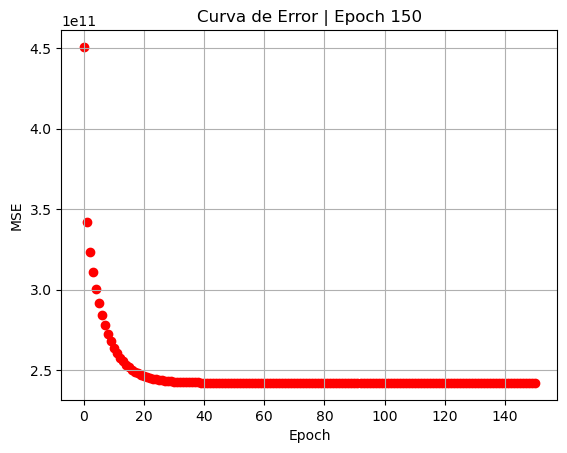

Epoca 200, valor de función de perdida (Loss Function) = 242100492055.35733, B = 13.32863, W = [216.25899271 312.54273618  72.31120161  26.66803522]


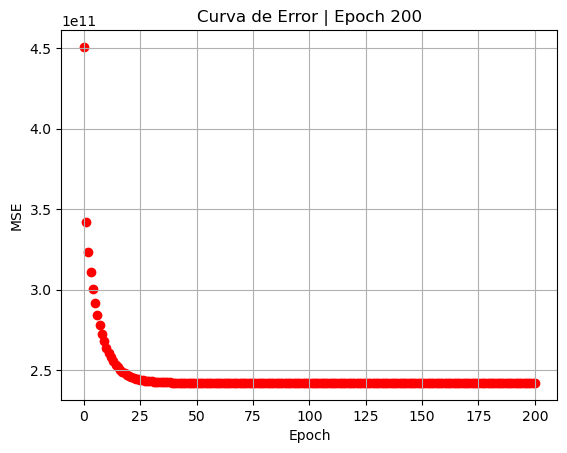

Epoca 250, valor de función de perdida (Loss Function) = 242080522112.29675, B = 16.45578, W = [216.25805727 312.54116221  90.09554368  33.30118458]


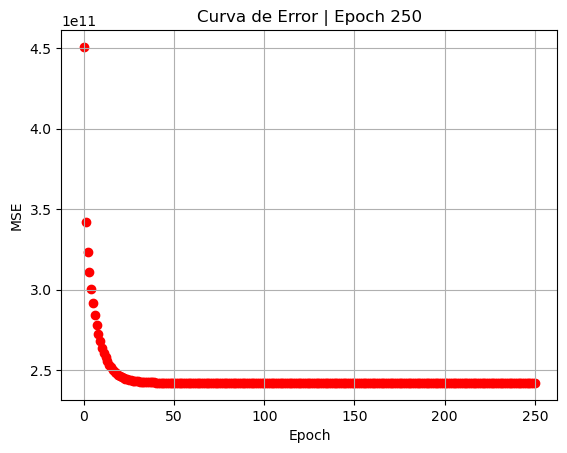

Epoca 300, valor de función de perdida (Loss Function) = 242060555602.54242, B = 19.58278, W = [216.25713657 312.53958832 107.87812193  39.93418465]


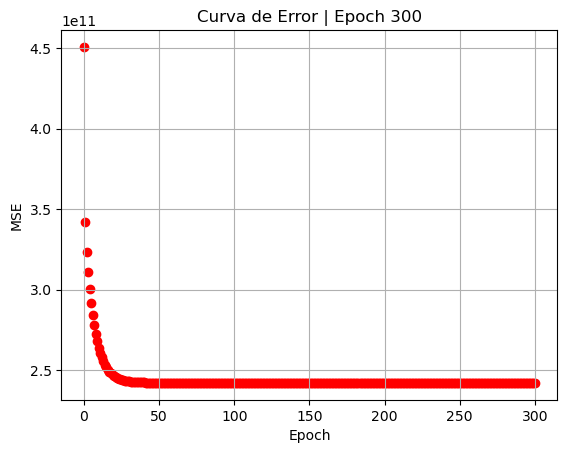

Epoca 350, valor de función de perdida (Loss Function) = 242040592525.44714, B = 22.70962, W = [216.25621616 312.53801451 125.65893651  46.56703543]


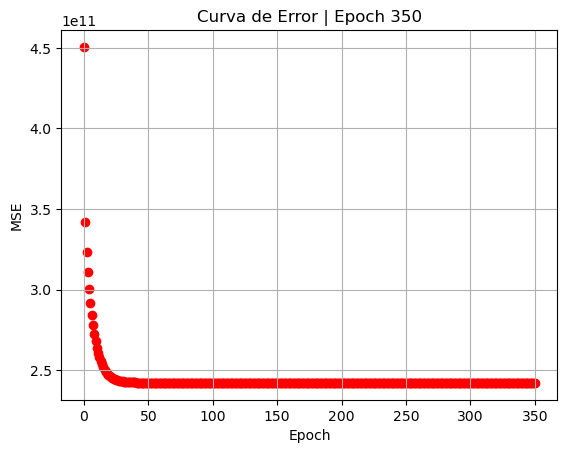

Valor de función de perdida (Loss Function) para testing = 238067320328.32196


In [ ]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.0000001, plot_cada_n=50)
testear(w, b, X1_test, y1_test)

## Correr training con selección de features #2: Epochs 400 y Alfa: 0.0000001

Epoca 50, valor de función de perdida (Loss Function) = 226274827502.12192, B = 3.55617, W = [219.56228314  18.97902261]


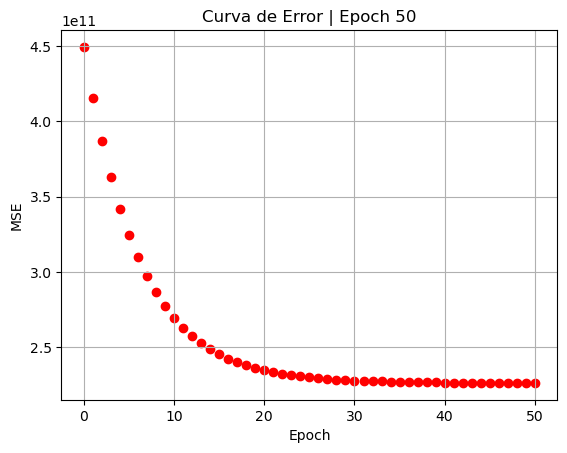

Epoca 100, valor de función de perdida (Loss Function) = 226179572526.21463, B = 6.70656, W = [216.31577769  36.76866477]


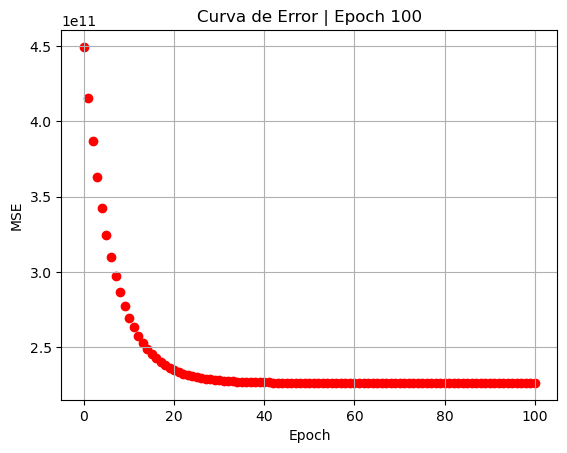

Epoca 150, valor de función de perdida (Loss Function) = 226145929291.90652, B = 9.85716, W = [216.26091103  54.55654195]


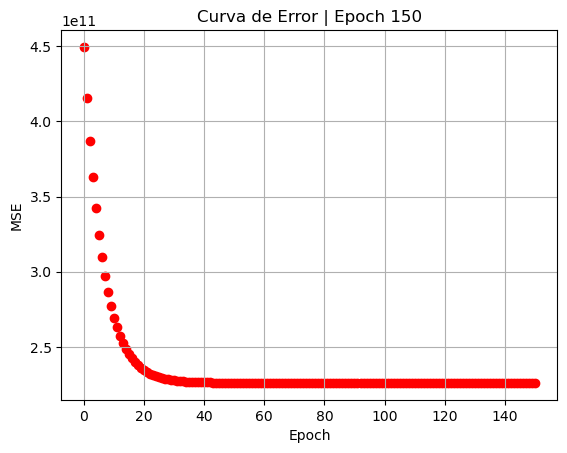

Epoca 200, valor de función de perdida (Loss Function) = 226112309685.92322, B = 13.00749, W = [216.25908727  72.34265431]


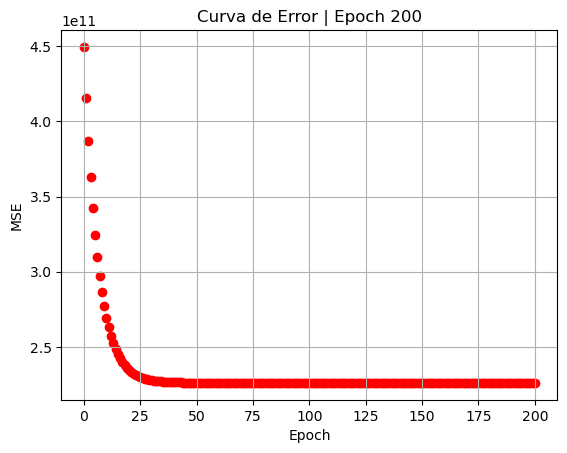

Epoca 250, valor de función de perdida (Loss Function) = 226078696696.24216, B = 16.15756, W = [216.25814512  90.12700203]


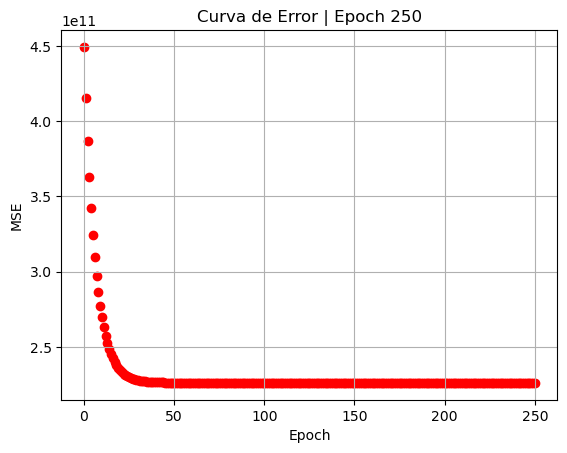

Epoca 300, valor de función de perdida (Loss Function) = 226045090316.86304, B = 19.30737, W = [216.25721771 107.90958529]


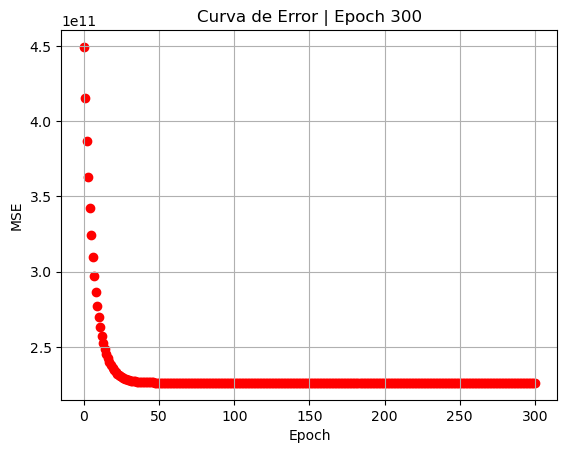

Epoca 350, valor de función de perdida (Loss Function) = 226011490546.48294, B = 22.45690, W = [216.25629061 125.69040425]


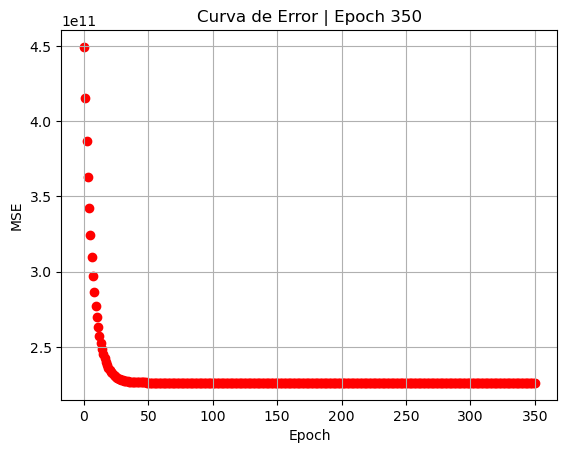

Valor de función de perdida (Loss Function) para testing = 223276728036.33902


In [ ]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=400, alfa=0.0000002, plot_cada_n=50)
testear(w, b, X2_test, y2_test)